In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GRADED 
Use global and groupby aggregates to answer the following questions

    - What is the average tip amount 
    - What is the average bill amount 
    - What is the average tip by gender 
    - What is the average tip on a sunday by gender 
    - Which party size gives the maximum tip as a percent of total bill amount

#### What is the average tip amount

In [2]:
print('The average tip amount is {}'.format(tips['tip'].mean()))

The average tip amount is 2.99827868852459


#### What is the average bill amount 

In [3]:
print("The average tip amount is $ {}".format(tips['total_bill'].mean()))

The average tip amount is $ 19.78594262295082


#### What is the average tip by gender

In [4]:
# Create a groupby variable that groups tip by gender
groupby_gender = tips['tip'].groupby(tips['sex']).mean()
listVal = list(groupby_gender)
print("Average tip for male is $ {} while femaile is $ {}".format(listVal[0], listVal[1]))

Average tip for male is $ 3.0896178343949052 while femaile is $ 2.833448275862069


#### What is the average tip on a sunday by gender

In [5]:
tips_sunday = tips[tips['day'] == 'Sun']
sun_tip = tips_sunday['tip'].groupby([tips_sunday['day'], tips_sunday['sex']]).mean()
listVal = list(sun_tip)
print("The average tip on a sunday for male is $ {} and female is $ {}".format(listVal[0], listVal[1]))

The average tip on a sunday for male is $ 3.2203448275862083 and female is $ 3.3672222222222223


#### Which party size gives the maximum tip as a percent of total bill amount

In [6]:
#add tip percent as column to the tips dataset
tips['tip_percent'] = (tips['tip'] / tips['total_bill']) * 100
tip_percent_max = tips.groupby(['tip_percent']).max()
highest_value = tip_percent_max.iloc[-1:]

size = highest_value.iloc[0]['size']

print("The size of party that gives maximum tip as a percent of total bill amount is {}".format(int(size)));

The size of party that gives maximum tip as a percent of total bill amount is 2


### GRADED
- Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
- Generate the plots using matplotlib, bokeh and seaborn

### Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)

#### Using Seaborn

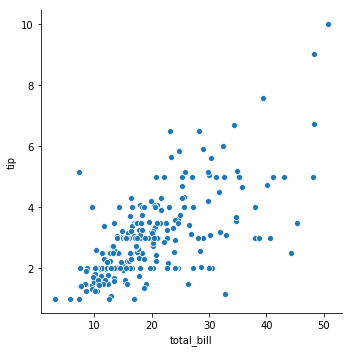

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips)

#### Using matplotlib

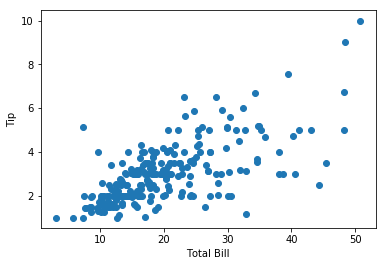

In [8]:
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.scatter(tips['total_bill'] , tips['tip'])

#### Using Bokeh

In [9]:
from bokeh.plotting import figure, show, output_notebook

output_notebook()
plot = figure(x_axis_label = 'Total Bill', y_axis_label = 'Tip')

plot.circle(tips['total_bill'], tips['tip'], color='orange')
show(plot)

Loading BokehJS ...

### GRADED
- Generate a box plot that shows average bill amount by day of week
- Generate a box plot that shows average bill amount by gender
- Show the above two plots side by side
- Generate the same plots using matplotlib and bokeh

### Generate a box plot that shows average bill amount by day of week
#### Using Seaborn

[Text(0, 0.5, 'Average Total Bill'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Average Bill by Gender')]

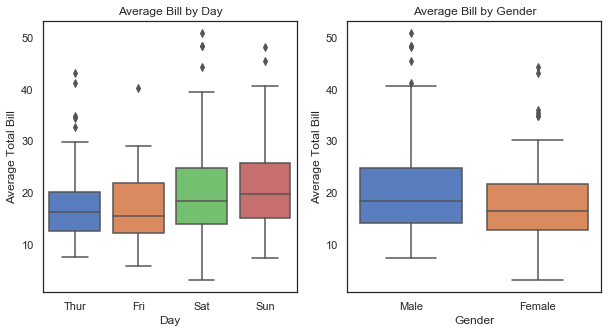

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)

boxplot1 = sns.boxplot(x="day", y="total_bill", data=tips)
boxplot1.set(xlabel = "Day", ylabel = "Average Total Bill", title = "Average Bill by Day")

plt.subplot(1, 2, 2)
boxplot2 = sns.boxplot(x="sex", y="total_bill", data=tips)
boxplot2.set(xlabel = "Gender", ylabel = "Average Total Bill", title = "Average Bill by Gender")

#### Using Matplotlib

Text(0.5, 1.0, 'Average bill amount by gender')

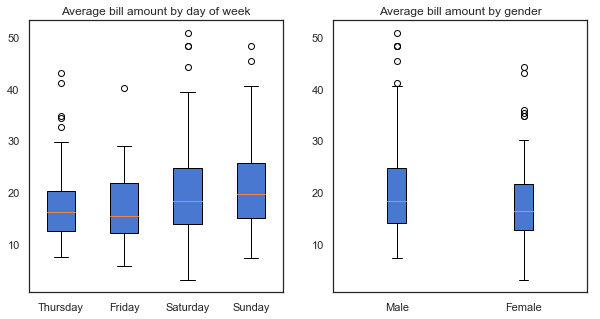

In [11]:
# boxplot that shows average bill amount by day of week
tips_thur = tips.loc[tips['day']=='Thur']
tips_fri = tips.loc[tips['day']=='Fri']
tips_sat = tips.loc[tips['day']=='Sat']
tips_sun = tips.loc[tips['day']=='Sun']

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)

data = [tips_thur['total_bill'], tips_fri['total_bill'], tips_sat['total_bill'], tips_sun['total_bill']]

plt.boxplot(data, patch_artist=True)
plt.gca().set_xticklabels(['Thursday','Friday','Saturday','Sunday'])
plt.gca().set_title('Average bill amount by day of week')

# boxplot that shows average bill amount by gender
tips_by_male = tips.loc[tips['sex']=='Male']
tips_by_female = tips.loc[tips['sex']=='Female']

plt.subplot(1,2,2)

data_gender = [tips_by_male['total_bill'], tips_by_female['total_bill']]

plt.boxplot(data_gender, patch_artist=True)
plt.gca().set_xticklabels(['Male','Female'])
plt.gca().set_title('Average bill amount by gender')

#### Using Bokeh

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
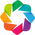

:Layout
   .BoxWhisker.Average_bill_by_day    :BoxWhisker   [day]   (total_bill)
   .BoxWhisker.Average_bill_by_gender :BoxWhisker   [sex]   (total_bill)

In [12]:
# import holoview and mark bokeh as its extension
import holoviews as hv
hv.extension('bokeh')

title = "Average bill by day"
boxwhisker1 = hv.BoxWhisker(tips, ['day'], 'total_bill', label=title)
boxwhisker1.options(show_legend=False, width=400)

title2 = "Average bill by gender"

boxwhisker2 = hv.BoxWhisker(tips, ['sex'], 'total_bill', label=title2)
boxwhisker2.options(show_legend=False, width=400)

boxwhisker1 + boxwhisker2

### GRADED
- Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
- Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
- Are tips larger during lunch or dinner (as a percentage of total_bill)
- Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
- Answer the question by visual examination of lmplot output

### Seaborn linear relationship plots

#### Basic linear plot between tip and total_bill

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Relationship between Tips and Total Bill')

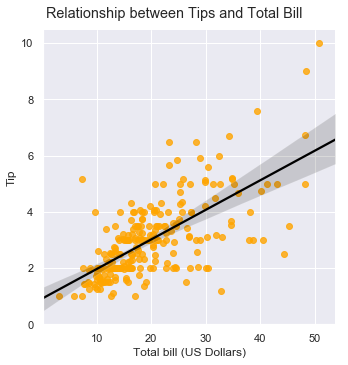

In [13]:
sns.set(color_codes=True)
g1 = sns.lmplot(x="total_bill", y="tip", data=tips, line_kws={'color': 'black'}, scatter_kws={'color': 'orange'})
g1.set_axis_labels("Total bill (US Dollars)", "Tip")
g1.fig.suptitle('Relationship between Tips and Total Bill', va='baseline')

If you look at the the trend, there are a lot more points below the diagonal than above, that is, `more customers tip below the recommended level`.

#### Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)?
#### Are tips larger during lunch or dinner (as a percentage of total_bill)?

Text(0.5, 0.98, 'Tip percent classified by smoking habit for lunch and dinner')

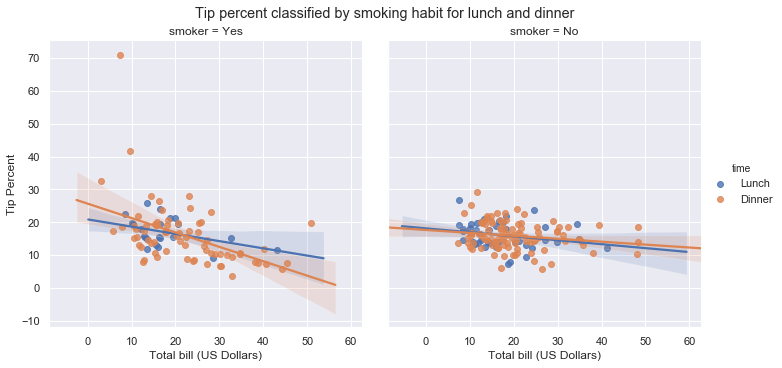

In [14]:
tips['tip_percent'] = (tips['tip'] / tips['total_bill']) * 100
g2 = sns.lmplot(x="total_bill", y="tip_percent", col="smoker", data=tips, hue="time")
g2.set_axis_labels("Total bill (US Dollars)", "Tip Percent")
g2.fig.suptitle('Tip percent classified by smoking habit for lunch and dinner', va='bottom')

If you look at the above plots, `lines for smokers have much steeper slope`, which gives us an idea that smokers give more tips as percentage of total bill.
Also tips tend to be `much higher at dinner`.

#### Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?

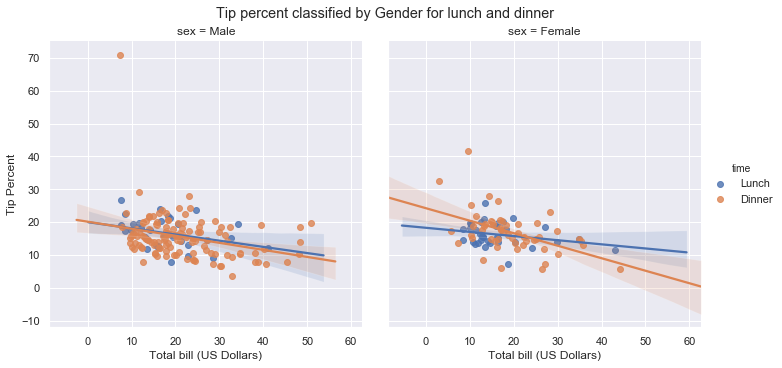

In [15]:
g3 = sns.lmplot(x="total_bill", y="tip_percent", col="sex", data=tips, hue="time")
g3.fig.suptitle('Tip percent classified by Gender for lunch and dinner', va='bottom')
g3.set_axis_labels("Total bill (US Dollars)", "Tip Percent")

This graph shows that `male` customers tend to pay more `tip as percentage of total bill` than females, with some tips going as high as `70%` of the total bill during `dinner` and it does not change between lunch and dinner; with males giving more tip at both times.